In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Load the dataset
url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(url)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
titanic.columns = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

In [4]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
X = titanic[features].copy()
y = titanic['Survived']

In [5]:
X.isnull().sum()

Pclass      0
Sex         0
Age       177
SibSp       0
Parch       0
Fare        0
dtype: int64

In [6]:
X['Age'].fillna(X['Age'].median(), inplace=True)

C:\Users\Arhamsoft\AppData\Local\Temp\ipykernel_3444\668403536.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['Age'].fillna(X['Age'].median(), inplace=True)


In [7]:
X.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [8]:
le = LabelEncoder()
X['Sex'] = le.fit_transform(X['Sex'])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [10]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.38869521912350596, 0.9722222222222222, 'x[1] <= 0.5\ngini = 0.475\nsamples = 623\nvalue = [381, 242]'),
 Text(0.19185756972111553, 0.9166666666666666, 'x[0] <= 2.5\ngini = 0.371\nsamples = 215\nvalue = [53, 162]'),
 Text(0.06772908366533864, 0.8611111111111112, 'x[2] <= 2.5\ngini = 0.123\nsamples = 122\nvalue = [8, 114]'),
 Text(0.05976095617529881, 0.8055555555555556, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.07569721115537849, 0.8055555555555556, 'x[5] <= 28.856\ngini = 0.109\nsamples = 121\nvalue = [7, 114]'),
 Text(0.05976095617529881, 0.75, 'x[5] <= 28.231\ngini = 0.208\nsamples = 51\nvalue = [6, 45]'),
 Text(0.05179282868525897, 0.6944444444444444, 'x[2] <= 37.0\ngini = 0.18\nsamples = 50\nvalue = [5, 45]'),
 Text(0.03187250996015936, 0.6388888888888888, 'x[2] <= 27.5\ngini = 0.1\nsamples = 38\nvalue = [2, 36]'),
 Text(0.02390438247011952, 0.5833333333333334, 'x[2] <= 23.5\ngini = 0.198\nsamples = 18\nvalue = [2, 16]'),
 Text(0.01593625498007968, 0.5277777777777

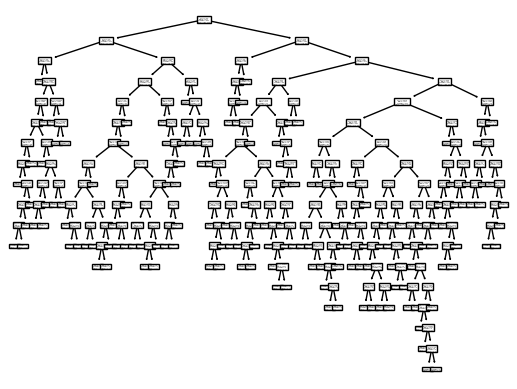

In [27]:
from sklearn import tree
tree.plot_tree(model)

In [11]:
y_pred = model.predict(X_test)

In [12]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.8059701492537313

Confusion Matrix:
 [[147  21]
 [ 31  69]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       168
           1       0.77      0.69      0.73       100

    accuracy                           0.81       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.80      0.81      0.80       268



In [15]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

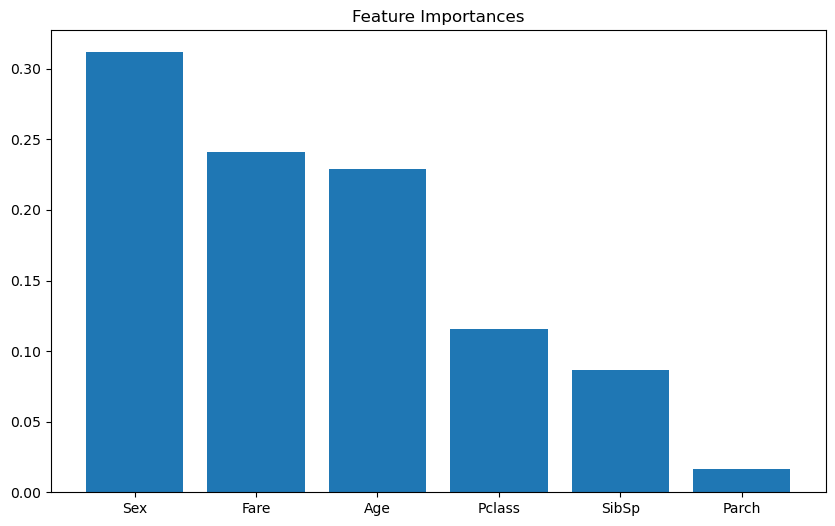

In [17]:
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [features[i] for i in indices])
plt.show()